___
## **Import Libraries**
___

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional
import os
from scipy.stats import pearsonr

___
## **Load Dataset**
___

In [186]:
automobile_df = pd.read_csv('automobile.txt')

___
## **Dataset Attributes**
___

In [187]:
automobile_df.size

5330

In [188]:
automobile_df.axes

[RangeIndex(start=0, stop=205, step=1),
 Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
        'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
        'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
        'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
        'highway-mpg', 'price'],
       dtype='object')]

In [189]:
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [190]:
automobile_df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


___
## **Dataset Preprocessing**
___

In [191]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### 1. **Duplicated Values**


In [192]:
# Find the total duplicated values in the dataset
dup_values = automobile_df.duplicated().sum()

print(f"There are a total of {dup_values} duplicated values in the dataset")

There are a total of 0 duplicated values in the dataset


#### 2. **Null Values**


In [193]:
# Find the total number of null values in the dataset
null_values = np.count_nonzero(automobile_df.isnull())

print(f"There are a total of {null_values} null values in the dataset")

There are a total of 0 null values in the dataset


NOTES:

* There are no duplicated values, and there are no null values in the dataset

In [194]:
# Store the numeric features of the dataframe as a dataset
numeric_df = automobile_df.select_dtypes(include='number')
numeric_df

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,26,27


In [195]:
# Store the object features of the dataframe as a dataset
object_df = automobile_df.select_dtypes(exclude='number')
object_df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400,16845
201,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,160,5300,19045
202,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,3.58,2.87,134,5500,21485
203,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,3.01,3.40,106,4800,22470


NOTES:

* On the object_df, we can see that normalized-losses, bore, stroke, horsepower, peak-rpm, price are columns that need to be cast into numeric features. Check if these values have any special characters that prevents them from being cast into numeric values

In [196]:
def special_characters(df: pd.DataFrame, column: str) -> None:
    """
    A function that is responsible for returning all the non numeric values in the column passed in the column 
    argument, in the dataframe object passed as the df argument

    Args:
        df: Dataframe
        A dataframe object

        column: string
        Column name found in the dataframe object

    Returns:
        None
    """
    # Find all the non numeric characters from the list
    non_numeric_characters = []
    # Iterate through all the column values
    for value in df[column].values:
        if not value.isdigit():
            # For all the characters that are not digits, add those to the non_numeric_characters list
            non_numeric_characters.append(value)

    # Remove the duplicated values in the list by casting to set datatype. Set data type do not store
    # duplicated values.
    non_numeric_characters = set(non_numeric_characters)

    # Store a frequency table of column value
    freq = df[column].value_counts()

    # Return the value as an integer where the frequency table index is '?'
    total_blanks = int(freq.filter(items=['?'], axis=0).iloc[0])

    print(f"column: {column}")
    print(f"Total '?' values: {total_blanks}")
    print(f"Special characters: '{' '.join(non_numeric_characters)}'")
    print(f"Total special characters: {len(non_numeric_characters)}")
    print(f"Blank values percentage: {(round(total_blanks / df.shape[0] * 100, 2))}%\n")


In [197]:
target_columns = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for column in target_columns:
    special_characters(automobile_df, column)

column: normalized-losses
Total '?' values: 41
Special characters: '?'
Total special characters: 1
Blank values percentage: 20.0%

column: bore
Total '?' values: 4
Special characters: '2.54 3.70 2.97 3.94 3.47 3.62 3.08 3.59 3.63 3.05 3.50 3.03 ? 3.60 3.61 2.68 3.27 3.24 3.15 3.13 3.58 3.78 3.54 3.46 3.01 3.19 3.34 3.17 2.91 3.33 2.92 2.99 3.76 3.74 3.43 3.35 3.80 3.31 3.39'
Total special characters: 39
Blank values percentage: 1.95%

column: stroke
Total '?' values: 4
Special characters: '3.29 3.47 3.07 3.64 3.08 2.36 3.11 3.86 3.12 3.40 3.50 3.03 ? 2.68 3.23 3.27 4.17 3.90 3.10 3.15 2.80 3.58 3.21 2.90 3.54 2.87 3.46 3.16 3.52 3.19 2.07 2.64 2.19 3.41 2.76 3.35 3.39'
Total special characters: 37
Blank values percentage: 1.95%

column: horsepower
Total '?' values: 2
Special characters: '?'
Total special characters: 1
Blank values percentage: 0.98%

column: peak-rpm
Total '?' values: 2
Special characters: '?'
Total special characters: 1
Blank values percentage: 0.98%

column: price
Tot

NOTE:

* normalized-losses, horsepower, peak-rpm, price columns has '?' value in the column that prevents the column from being cast into a numeric column

* bore, and stroke columns contain '?' values, but the decimal point values are also being handled as a special character, this means that once the '?' values are handled, the column can be cast into a float column

* Before we can decide on how to handle the the missing values, we need to understand why the values are missing.

* normalized-losses blank values cannot be dropped because they represent 20% of the values in the column

In [198]:
def mean_blank_imputation(column: str, df: Optional[pd.DataFrame] = automobile_df) -> None:
    """
    A function that imputes the missing values with the mean of the column argument passed,
    grouped by the make of the vehicle.

    Args:
        column: string
        A name of a column that is to be used to measure the mean of a car make in order to
        impute te missing values using that imputation
    
    Return: 
        None
    """

    # 1. Filter the dataframe by the column values that do not have the value '?'. 
    # 2. Convert the column into an int 
    # 3. Group the filtered dataframe by the column 'make'
    # 4. Apply mean aggregation on the column passed as an argument
    mean_make_df = (
        df[df[column] != '?'].astype({column: 'float64'}).groupby(['make'])[[column]].mean()
    )

    # Store the value counts frequency table of the column passed as an argument
    freq_table = df[column].value_counts()
    # Return the value where the index value is '?'
    total_blanks = freq_table.filter(items=['?'], axis=0).values[0]
    print(f"Total blanks before imputation: {total_blanks}")

    dct = {}
    # Iterate over the key and value items of the column
    for index, value in mean_make_df[column].items():
        # Update the key: value pairs into the dictionary
        dct.update({index: float(value)})
    print(dct)

    # Filter the dataframe where the value in the column argument is '?' and select the column 'make'
    changed_indices = []
    # Iterate through all the values of the make column, when the column argument passed has missing
    # values
    for index, make in df[df[column] == '?']['make'].items():
        if make in dct.keys():
            # Reassign values
            automobile_df.at[index, column] = dct.get(make)
            # Append the index to the changed_index
            changed_indices.append(str(index)) 
    print(column)
    print(f"Total blank after imputations: {total_blanks - len(changed_indices)}")
    print(f"Index values changed: {', '.join(changed_indices)}\n")

In [199]:
for column in target_columns:
    mean_blank_imputation(column=column)

Total blanks before imputation: 41
{'audi': 161.0, 'bmw': 190.0, 'chevrolet': 100.0, 'dodge': 133.44444444444446, 'honda': 103.0, 'jaguar': 145.0, 'mazda': 123.93333333333334, 'mercedes-benz': 102.8, 'mitsubishi': 146.2, 'nissan': 135.16666666666666, 'peugot': 161.0, 'plymouth': 129.0, 'porsche': 186.0, 'saab': 127.0, 'subaru': 92.25, 'toyota': 110.29032258064517, 'volkswagen': 121.25, 'volvo': 91.45454545454545}
normalized-losses
Total blank after imputations: 10
Index values changed: 5, 7, 9, 14, 15, 16, 17, 48, 49, 63, 66, 71, 73, 74, 82, 83, 84, 109, 110, 113, 114, 124, 126, 127, 128, 129, 181, 189, 191, 192, 193

Total blanks before imputation: 4
{'alfa-romero': 3.206666666666667, 'audi': 3.172857142857143, 'bmw': 3.47375, 'chevrolet': 2.9899999999999998, 'dodge': 3.0944444444444446, 'honda': 3.0215384615384617, 'isuzu': 3.2, 'jaguar': 3.6, 'mazda': 3.2869230769230766, 'mercedes-benz': 3.605, 'mercury': 3.78, 'mitsubishi': 3.2507692307692304, 'nissan': 3.2544444444444443, 'peugot'

NOTES:

* Based on the output above:
    * There is not enough information about the makes _`alfa-romero, isuzu, mercury and renault`_ to impute the normalized-losses.

    * These normalized-losses that cannot be computed total 10 records

    * The two blank values for peak-rpm and horsepower are from the make renault.

* Due to the fact that more than one value is missing for the renault make, at _`normalized-losses, peak-rpm and horsepower`_, and because of the low number of records for the renault make, we can then surmise that the values are missing completely at random **(MCAR)**. This assumption can be made because other features are not related to each other for the particular model, renault. 

* The normalized-losses of values can be seen as missing not at random **(MNAR)** simply because for the vehicles with this missing value, all the records of that make were not recorded, suggesting that either the normalized-losses do not exist for that make, or that the feature were not recorded at all. 

* Due to these missing records only accounting for 5% of the total records, it is safe to drop the records with the _`'?'`_ value in the normalized-losses feature. These missing values also account for the missing values in the peak-rpm and horsepower columns.

In [200]:
# View the blank values in the horsepower column
automobile_df[automobile_df['horsepower'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


In [201]:
# View the blank values in the peak-rpm column
automobile_df[automobile_df['peak-rpm'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


In [202]:
# View the blank values in the normalized-losses column
automobile_df[automobile_df['normalized-losses'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
43,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
46,2,?,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048
75,1,?,mercury,gas,turbo,two,hatchback,rwd,front,102.7,...,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


In [203]:
# Check the total number of records for the isuzu make
automobile_df[automobile_df['make'] == 'isuzu']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
43,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
46,2,?,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048


In [204]:
# Check the number of records for the mercury brand
automobile_df[automobile_df['make'] == 'mercury']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
75,1,?,mercury,gas,turbo,two,hatchback,rwd,front,102.7,...,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503


In [205]:
# Check the number of records for the alfa-romero brand
automobile_df[automobile_df['make'] == 'alfa-romero']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [206]:
# Check the total number of records for the renault make
automobile_df[automobile_df['make'] == 'renault']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


#### 3. **Drop Records**
Drop the remaining blank values in the normalized-losses column

In [207]:
# Confirm the shape of the dataset before dropping the blank values
automobile_df.shape

(205, 26)

In [208]:
# Store the index values that need to be dropped
drop_index_values = automobile_df[automobile_df['normalized-losses'] == '?'].index

# Drop the index values inplace
automobile_df = automobile_df.drop(index=drop_index_values).reset_index(drop=True)

# Confirm the shape of the dataframe after dropping the index values
automobile_df.shape

(195, 26)

#### 4. **Cast columns**
`[normalized-losses, bore, stroke, horsepower, peak-rpm, price]` datatypes into the correct datatypes.

In [209]:
automobile_df = automobile_df.astype(
    {'normalized-losses':'int'
     , 'bore': 'float'
     , 'stroke': 'float'
     , 'horsepower': 'int'
     , 'peak-rpm':'int'
     , 'price': 'float'}
)

In [210]:
# Confirm the object value features
automobile_df.select_dtypes(exclude='number')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
1,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
2,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
4,audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
190,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
191,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
192,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
193,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [211]:
# Confirm the numeric features
automobile_df.select_dtypes(include='number')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
2,2,161,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.0
3,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.0
4,1,161,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
191,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
192,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
193,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


#### 5. **Outliers**

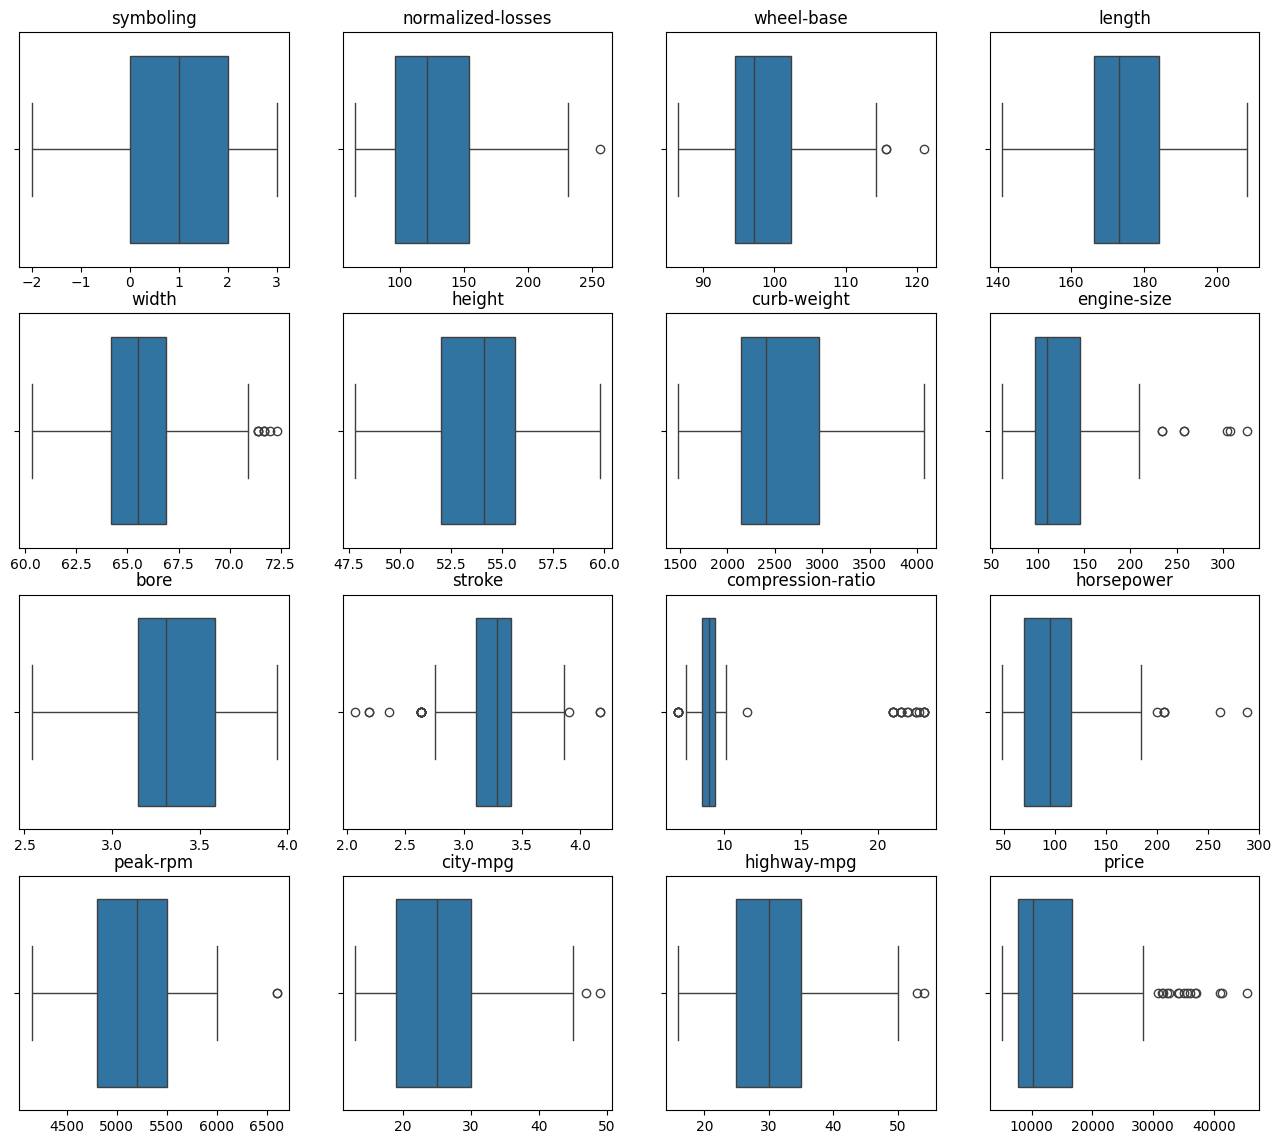

In [212]:
# Find the Boxplot values of each numeric variable within the dataset

# Store the total number of null numeric values in the dataset
total_num_columns = automobile_df.select_dtypes(include='number').columns.shape[0]

# Store the names of the numeric columns
all_num_col_names = automobile_df.select_dtypes(include='number').columns

# Create the subplots for each column
fig, ax = plt.subplots(4, 4, figsize=(16, 14), sharex=False, sharey=False)
counter = 0
# Use nested loop to update each row and each column with a boxplot
for row in range(4):
    for column in range(4):
        # Plot Boxplot 
        sns.boxplot(data=automobile_df, x=f'{all_num_col_names[counter]}', ax=ax[row][column])
        ax[row][column].set_title(f'{all_num_col_names[counter]}')
        ax[row][column].set_xlabel('')
        counter += 1

`NOTE`:

**1. The affects of outliers**

To understand how to handle outliers within a dataset, we need to understand why they occur. Is it because of human error in inputing the the data, or do the outliers occur because of the variability within our data? 

To further understand this presented issue, we need to understand what in our dataset do these outliers affect. Accoding to Harika Bonthu (2024), in statistics, we have three measures of central tendency that help us in describing the dataset that we are working with. 

Mean is the accurate measure to describe data when we do not have any outliers. While the median value is used when we do have outliers in the dataset, and mode is used when we have outliers in the dataset and more than half of the values in the feature are the same. 

When we have outliers in the dataset, the mean value gets affected and in turn, it affects the standard deviation of the feature. Therefore, to obtain a more accurate mean value, and in turn, make more accurate statistical analysis and inferences, we need to find a way to handle our outliers. 
___

**2. Handling outliers**

According to a blog written on CareerFoundryBlog, there are three techniques we can use to treat outliers:
We can drop the outliers similarly to how we would drop null values, cap the outliers and finally, replacing the outliers with imputations like how we would when dealing with null values as well. (Eric Kleppen, 2023). 

When making the decision on which method we chose to proceed with, we need to account for the change it will have on the mean value of the dataset as well as the standard deviation of the variable and document these changes. 

___
**3. Standard deviation**

In an article written by the investopedia team, standard deviation is a statistical measurement that looks at far a group of numbersis from the mean, simpy put measuring how far numbers are apart in a dataset (Investopedia, 2024). To calculate the standard deviation, the variance between each value in the dataset and the datasets mean is caluculated. That value is then squared in order to weigh outliers heavier than values that appear closer to the mean. For these reasons, it is then possible to surmise that the presence of outliers would signal the increase in the variance of a dataset, and therefore, by treating outliers, we would be reducing the variance, and as a result, the standard deviation within the dataset. 



In [213]:
automobile_df.shape

(195, 26)

In [214]:
def outlier_imputation(column: str, dataframe: Optional[pd.DataFrame] = automobile_df, drop_outliers: Optional[bool] = False):
    """
    A function that is responsible for imputing the outliers of the column argument passed in the dataframe 
    object passed as an argument. Default dataframe object is the autombile_df.

    Args:
        column: string
        Name of a numeric column in the dataframe 

        df: dataframe
        A pandas dataframe object that contains numeric features. If None, automobile_df is passed
        at function call. 

        drop_outliers: Drops the outliers of the dataframe, default is False
    
    Return:
        None
    """
    # Store the original column values
    original_column = dataframe[column]

    # Measure the first quantile of the column
    q1 = dataframe[column].quantile(0.25)

    # Measure the third wuantile of the column
    q3 = dataframe[column].quantile(0.75)

    # Find the IQR
    IQR = q3 - q1

    # Using the IQR, find the upper and lower outliers
    upper = (dataframe[column] > q3 + (IQR * 1.5))
    lower = (dataframe[column] < q1 - (IQR * 1.5))

    # Store the outliers of the column as a series
    outliers = dataframe[column][upper | lower]

    # Store the orginal columns measures of central tendency
    original_mean = dataframe[column].mean()
    original_median = dataframe[column].median()
    original_mode = int(dataframe[column].mode().loc[0])
    original_std = dataframe[column].std()
    
    print(f"Column name: {column}")
    print(f"Total number of outliers: {len(outliers)}")
    print(f"Original mean value: {original_mean}")
    print(f"Original standard deviation value: {original_std}")
    print(f"Original median value: {original_median}")
    print(f"Original mode value: {original_mode}\n")

    # Return the frequency table of the column and normalie 
    # the values to return percentage composition of values for the column
    freq_percentage = automobile_df['price'].value_counts(normalize=True) * 100

    def dist_plot(original_col, new_col):
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        sns.histplot(original_col, ax=ax[0])
        ax[0].set_title('Original Distribution')
        sns.histplot(new_col, ax=ax[1])
        ax[1].set_title('New Distribution')
        plt.show()


    if len(outliers) == 0:
        pass

    elif drop_outliers == True:
        dataframe.drop(index=outliers.index, inplace=True)
        print("\nOutliers have been dropped")
        print(f"New mean dropping outliers: {dataframe[column].mean()}")
        print(f"New standard deviation dropping outliers: {dataframe[column].std()}")

        dist_plot(original_column, dataframe[column])

    elif float(freq_percentage.iloc[0]) > 50:
        dataframe.loc[outliers.index, column] = original_mode
        print("\nMode has been used to impute the outliers.")
        print(f"New mean using mode value: {dataframe[column].mean()}")
        print(f"New standard deviation mode value: {dataframe[column].std()}")

        dist_plot(original_column, dataframe[column])

    else:
        upper_limit = dataframe[column].mean() + (3 * dataframe[column].std())
        lower_limit = dataframe[column].mean() - (3 * dataframe[column].std())

        new_column = (
            np.where(dataframe[column] > upper_limit
                 , upper
                 , np.where(dataframe[column] < lower_limit, lower_limit, dataframe[column]))
        )

        if new_column.std() > original_column.std():
            new_column = (
                np.where(dataframe[column] > upper_limit
                    , dataframe[column].median()
                    , np.where(dataframe[column] < lower_limit, dataframe[column].median(), dataframe[column]))
            )

            dataframe[column] = new_column
            print(f"\nNew mean using median: {dataframe[column].mean()}")
            print(f"New standard deviation median: {dataframe[column].std()}")

        else:
            dataframe[column] = new_column
            print(f"\nNew mean using cap limit: {dataframe[column].mean()}")
            print(f"New standard deviation cap limit: {dataframe[column].std()}")

        dist_plot(original_column, dataframe[column])


Column name: symboling
Total number of outliers: 0
Original mean value: 0.8102564102564103
Original standard deviation value: 1.2476358822748026
Original median value: 1.0
Original mode value: 0

Column name: normalized-losses
Total number of outliers: 1
Original mean value: 126.36923076923077
Original standard deviation value: 35.95109904580262
Original median value: 121.0
Original mode value: 161


New mean using cap limit: 125.06153846153846
New standard deviation cap limit: 35.849144228988685


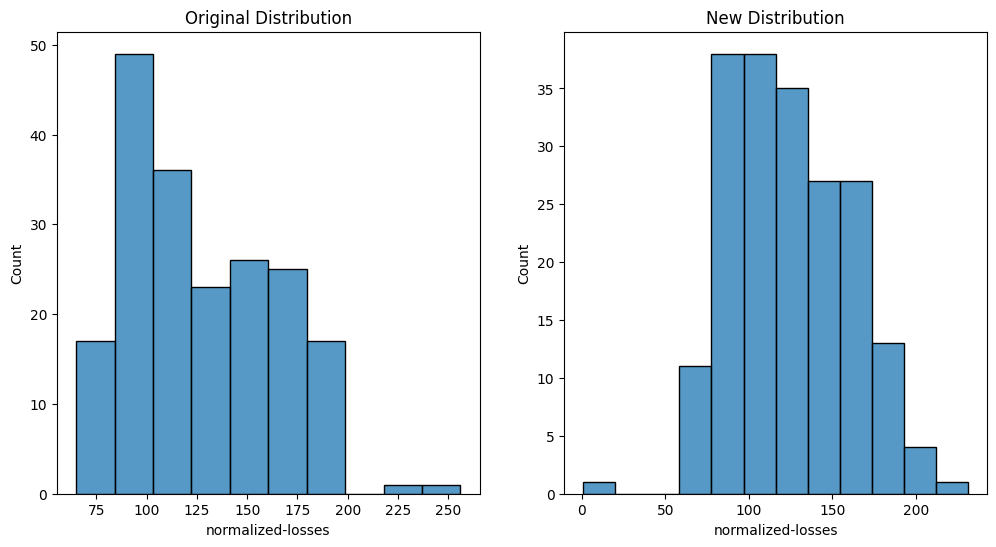

Column name: wheel-base
Total number of outliers: 3
Original mean value: 98.97025641025641
Original standard deviation value: 6.037130594098786
Original median value: 97.2
Original mode value: 93


New mean using median: 98.84871794871795
New standard deviation median: 5.828320114594027


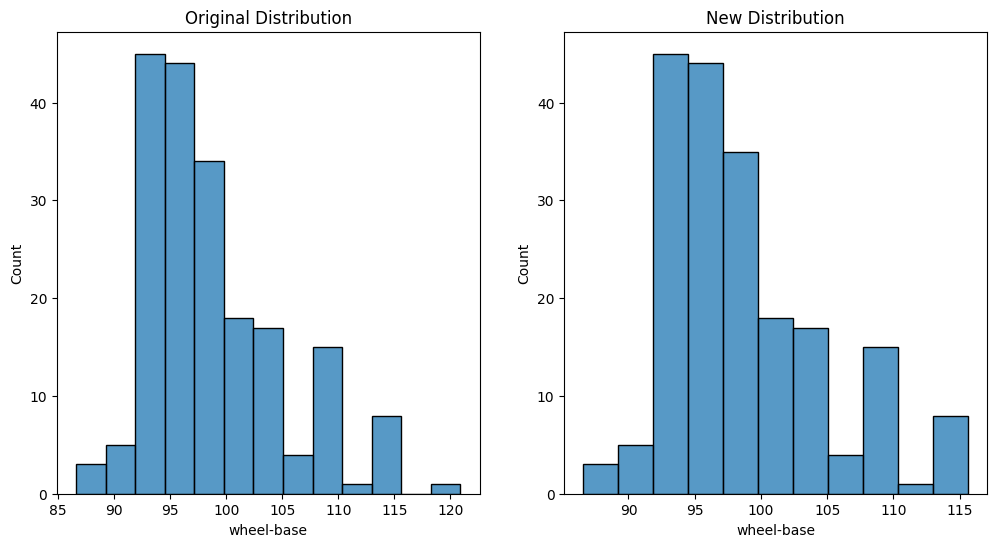

Column name: length
Total number of outliers: 0
Original mean value: 174.25384615384615
Original standard deviation value: 12.481959066635245
Original median value: 173.2
Original mode value: 157

Column name: width
Total number of outliers: 8
Original mean value: 65.95948717948717
Original standard deviation value: 2.1518751696993976
Original median value: 65.5
Original mode value: 63


New mean using cap limit: 65.95948717948717
New standard deviation cap limit: 2.1518751696993976


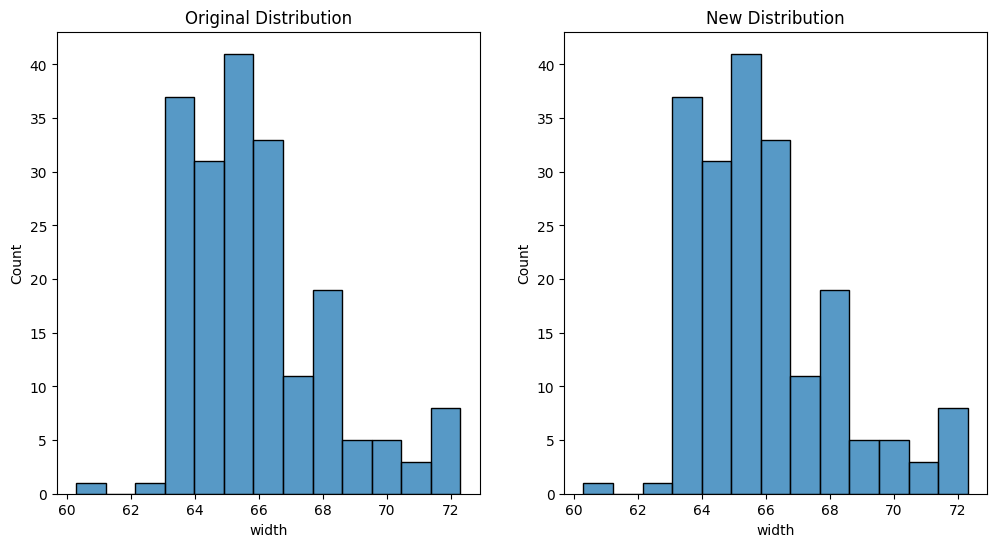

Column name: height
Total number of outliers: 0
Original mean value: 53.81641025641026
Original standard deviation value: 2.42517667246693
Original median value: 54.1
Original mode value: 50

Column name: curb-weight
Total number of outliers: 0
Original mean value: 2559.8410256410257
Original standard deviation value: 528.2401831475207
Original median value: 2410.0
Original mode value: 2385

Column name: engine-size
Total number of outliers: 7
Original mean value: 127.12820512820512
Original standard deviation value: 42.4651339622511
Original median value: 110.0
Original mode value: 92


New mean using cap limit: 119.6974358974359
New standard deviation cap limit: 38.04562837899136


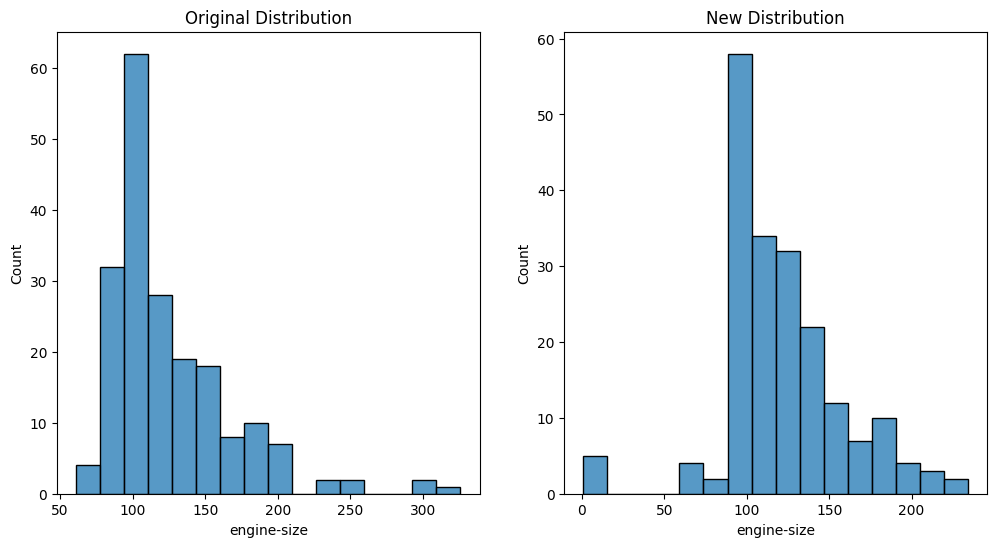

Column name: bore
Total number of outliers: 0
Original mean value: 3.3297830374753445
Original standard deviation value: 0.2694373031714922
Original median value: 3.31
Original mode value: 3

Column name: stroke
Total number of outliers: 18
Original mean value: 3.256958579881657
Original standard deviation value: 0.30853872768103496
Original median value: 3.29
Original mode value: 3


New mean using cap limit: 3.259748462909942
New standard deviation cap limit: 0.2990634755479199


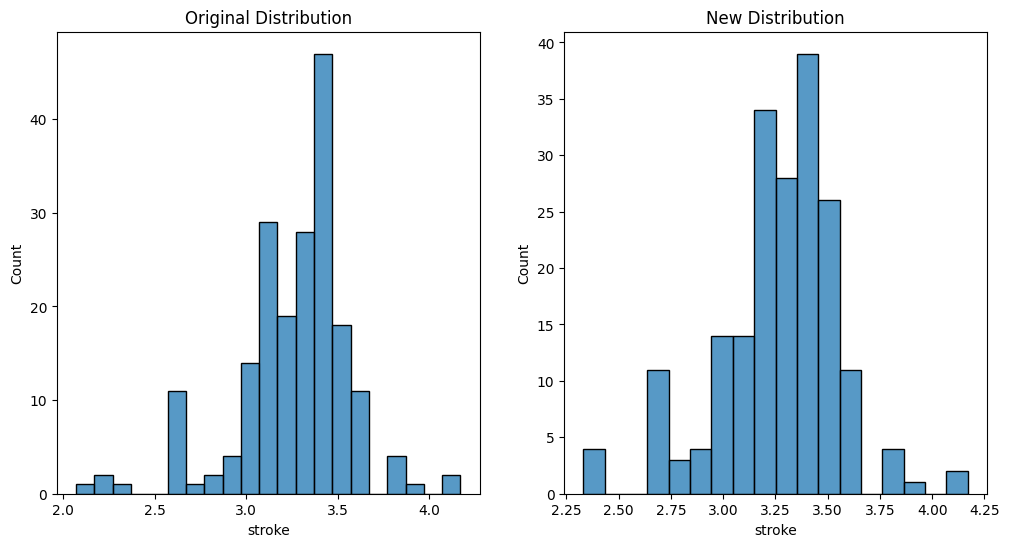

Column name: compression-ratio
Total number of outliers: 28
Original mean value: 10.20471794871795
Original standard deviation value: 4.061975967462534
Original median value: 9.0
Original mode value: 9


New mean using cap limit: 9.198564102564104
New standard deviation cap limit: 3.4713969661568345


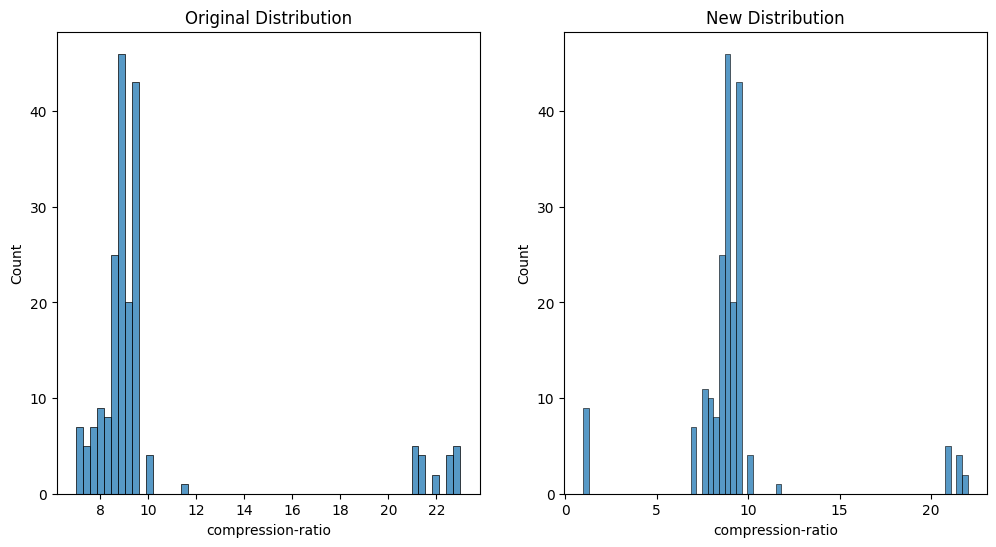

Column name: horsepower
Total number of outliers: 6
Original mean value: 104.12820512820512
Original standard deviation value: 39.831332203584964
Original median value: 95.0
Original mode value: 68


New mean using cap limit: 101.31794871794872
New standard deviation cap limit: 37.22225578424096


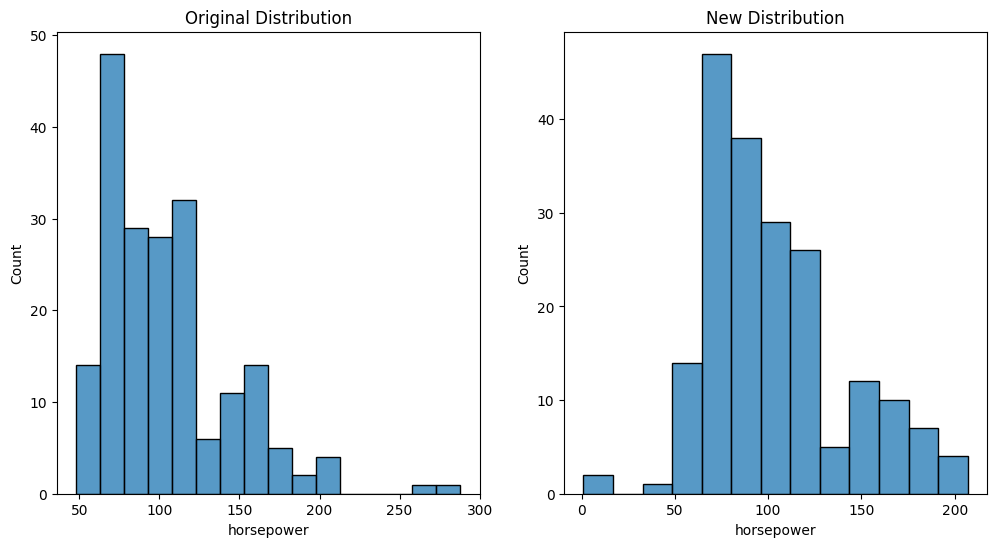

Column name: peak-rpm
Total number of outliers: 2
Original mean value: 5127.4358974358975
Original standard deviation value: 487.34351413206207
Original median value: 5200.0
Original mode value: 5500


New mean using median: 5113.076923076923
New standard deviation median: 463.6762214975406


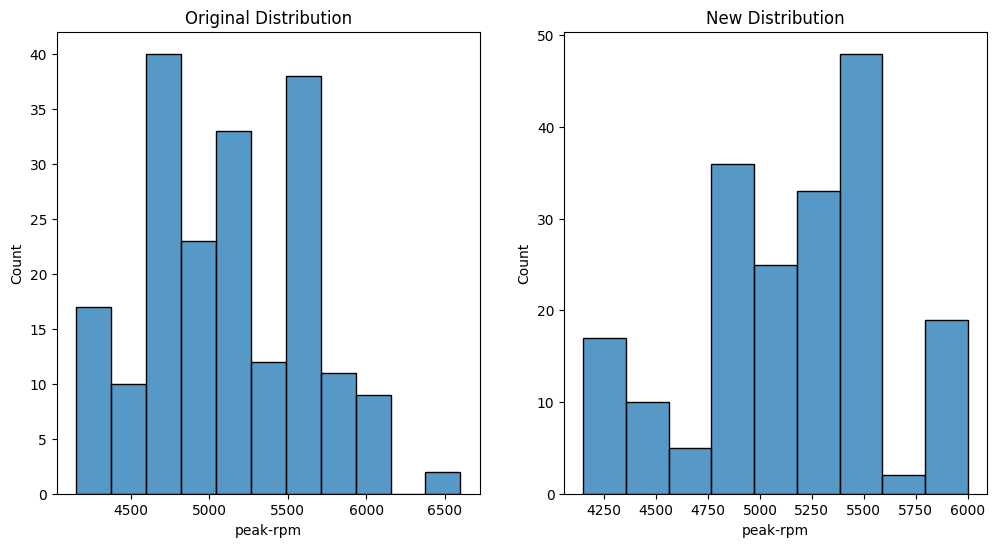

Column name: city-mpg
Total number of outliers: 2
Original mean value: 25.23076923076923
Original standard deviation value: 6.532478486641178
Original median value: 25.0
Original mode value: 31


New mean using median: 24.892307692307693
New standard deviation median: 5.932063175075334


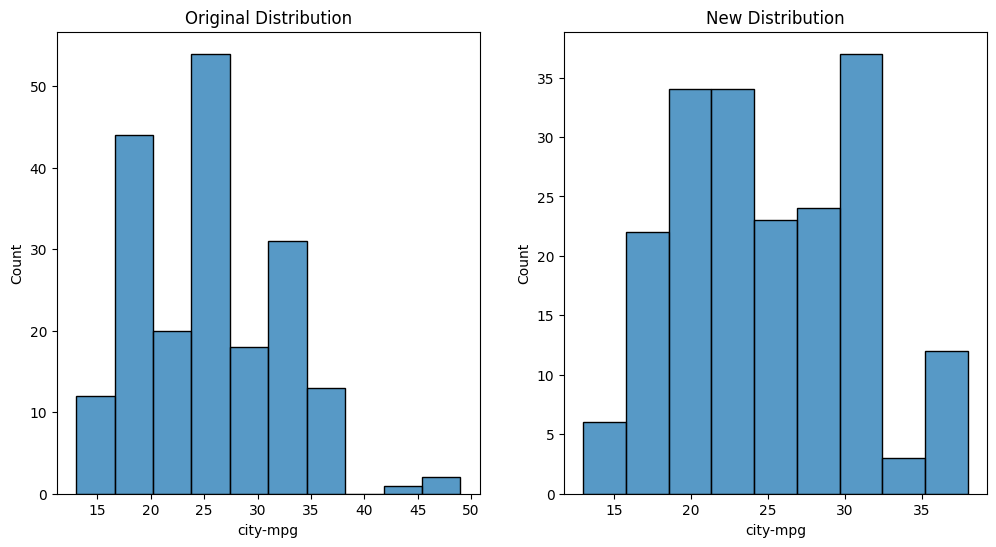

Column name: highway-mpg
Total number of outliers: 2
Original mean value: 30.73846153846154
Original standard deviation value: 6.913180873222125
Original median value: 30.0
Original mode value: 25


New mean using median: 30.497435897435896
New standard deviation median: 6.511191284871707


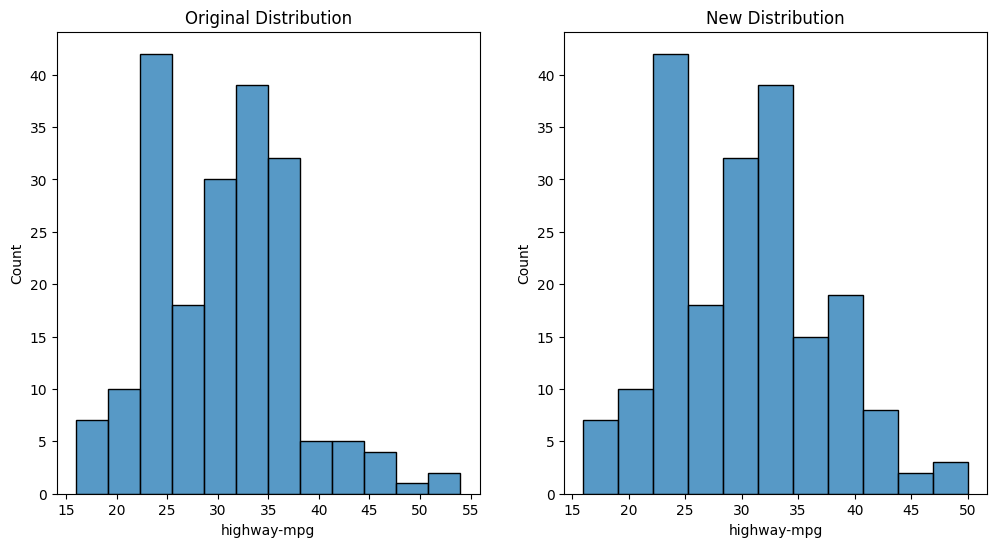

Column name: price
Total number of outliers: 15
Original mean value: 13353.188034188035
Original standard deviation value: 8146.481355542527
Original median value: 10295.0
Original mode value: 5572


New mean using cap limit: 12698.459829059831
New standard deviation cap limit: 7445.712773333961


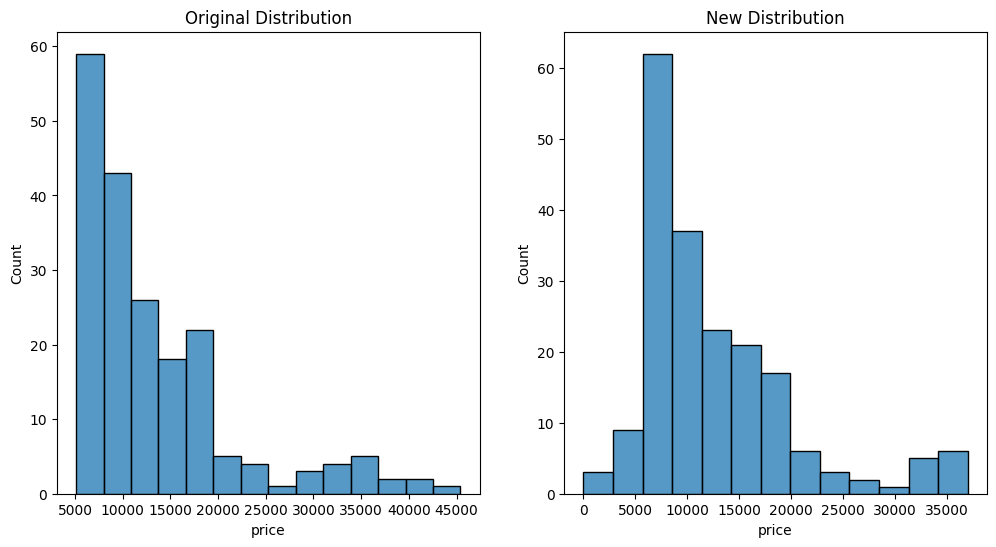

In [215]:
# Store the name of the numeric columns
numeric_columns = automobile_df.select_dtypes(include='number').columns

for column in numeric_columns:
    outlier_imputation(column)

`PRE-PROCESSING SUMMARY`:

_Duplicated Values_:
* There were no duplicated values within the dataset

_Null Values_:
* There were no explicit null values within the dataset, however, missing values were present in the form of values '?'. The following columns had the '?' values: _[normalized-losses, bore, stroke, horsepower, peak-rpm and price]_. To impute these values, we used the mean value of each make for each column, and filled those as the missing values.

_Dropped Values_:
* Even after the processing of the missing values, we still found that there were a total of 10 values that were not immputed. This is because there were not enough records within the dataset to find the mean values. Due to this, it was decided that the best course of action would be to completely remove the records because they only accounted for 5% of the total values in the dataset. 

_Cast Columns_:
* The following columns were cast into different data types: _[normalized-losses (integer), bore (float), stroke (float), horsepower (integer), peak-rpm (integer), price (float)]_

_Outliers_:
* The following columns had outliers: _[normalized-losses, wheel-base, width, engine-size, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]_. The outliers were handled using mode computation, median computation,and cap outliers, depending on the conditions met by the column values. If there was a a value that accounted for more than 50 percent of the values in the dataset, then the mode value would be used to replace the outliers. If not, then the values would be compared to the upper and lower limits that were set according to the standard deviation of the column, and the values that were greater than the upper limits were then replaced by the upper limits, and similarly so for the values that were lower than the lower limit variable that was defined. If using upper and lower limits increased the standard deviation compared to the original column, the values that were greater than the upper and lower limits were replaced with the median value from the orginal column values. 

___
## **Dataset EDA**
___

#### 1. **Summary Statistics**

In [216]:
# Confirm the columns and column types, with no missing data
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   normalized-losses  195 non-null    float64
 2   make               195 non-null    object 
 3   fuel-type          195 non-null    object 
 4   aspiration         195 non-null    object 
 5   num-of-doors       195 non-null    object 
 6   body-style         195 non-null    object 
 7   drive-wheels       195 non-null    object 
 8   engine-location    195 non-null    object 
 9   wheel-base         195 non-null    float64
 10  length             195 non-null    float64
 11  width              195 non-null    float64
 12  height             195 non-null    float64
 13  curb-weight        195 non-null    int64  
 14  engine-type        195 non-null    object 
 15  num-of-cylinders   195 non-null    object 
 16  engine-size        195 non

In [217]:
# Provide the sumamary for the numeric variables
automobile_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.810256,125.061538,98.848718,174.253846,65.959487,53.816410,2559.841026,119.697436,3.329783,3.259748,9.198564,101.317949,5113.076923,24.892308,30.497436,12698.459829
std,1.247636,35.849144,5.828320,12.481959,2.151875,2.425177,528.240183,38.045628,0.269437,0.299063,3.471397,37.222256,463.676221,5.932063,6.511191,7445.712773
min,-2.000000,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,1.000000,2.540000,2.331342,1.000000,1.000000,4150.000000,13.000000,16.000000,1.000000
25%,0.000000,95.000000,94.500000,166.300000,64.200000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7649.000000
50%,1.000000,121.000000,97.200000,173.200000,65.500000,54.100000,2410.000000,110.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,25.000000,30.000000,9995.000000
75%,2.000000,153.000000,102.400000,184.050000,66.900000,55.650000,2964.500000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16214.000000
max,3.000000,231.000000,115.600000,208.100000,72.300000,59.800000,4066.000000,234.000000,3.940000,4.170000,22.000000,207.000000,6000.000000,38.000000,50.000000,37028.000000


#### 2. **Feature Engineering**

In [218]:
object_features = automobile_df.select_dtypes(exclude='number').columns
object_features

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [219]:
# Store the feature name with unique values less than 5
lt_5_uniques = []
for column in object_features:
    print(f"{column} has {automobile_df[column].nunique()} unique values")
    # If total number of unique values are less than 5
    if automobile_df[column].nunique() < 5:
        # Then add the column name to the 'lt_5_uniques' list 
        lt_5_uniques.append(column)

make has 18 unique values
fuel-type has 2 unique values
aspiration has 2 unique values
num-of-doors has 3 unique values
body-style has 5 unique values
drive-wheels has 3 unique values
engine-location has 2 unique values
engine-type has 7 unique values
num-of-cylinders has 7 unique values
fuel-system has 7 unique values


NOTES:

* Convert The object columns that have less than 5 unique values into numeric values using one hot encoding

* To avoid dummy trap, we will drop one of the dummy columns so that the values are not perfectly correlated

In [220]:
# Confirm the shape of the dataframe before adding dummies
automobile_df.shape

(195, 26)

In [221]:
def add_dummies(column: Optional[str] | list, df: Optional[pd.DataFrame] = automobile_df) -> pd.DataFrame:
    """
    A function that converts categorical features into numerical values, and then drops the categorical
    feature, after adding the new dummy variables at the end of the dataframe

    Args:
        column: string | list
        column/s that are in the dataframe that are categorical in nature. 

    Return:
        df: dataframe
        A pandas dataframe object of the dataframe with the added dummy columns and dropped categorical 
        features
    """
    # Create dummies
    dummy_columns = pd.get_dummies(data=df[column], dtype=int, drop_first=True)
    df = pd.concat([df, dummy_columns], axis=1)

    return df

In [222]:
# Add dummies
automobile_df = add_dummies(lt_5_uniques)

In [223]:
# Confirm the shape after adding the dummies
automobile_df.shape

(195, 33)

In [224]:
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,fuel-type_gas,aspiration_turbo,num-of-doors_four,num-of-doors_two,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear
0,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,24.0,30.0,13950.0,1,0,1,0,1,0,0
1,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,18.0,22.0,17450.0,1,0,1,0,0,0,0
2,2,161.0,audi,gas,std,two,sedan,fwd,front,99.8,...,19.0,25.0,15250.0,1,0,0,1,1,0,0
3,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,19.0,25.0,17710.0,1,0,1,0,1,0,0
4,1,161.0,audi,gas,std,four,wagon,fwd,front,105.8,...,19.0,25.0,18920.0,1,0,1,0,1,0,0


#### 3. **Data Visualization**

`Categorical  Data`

In [225]:
categorical_data =automobile_df.select_dtypes(exclude='number')
categorical_data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
1,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
2,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
4,audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi


##### a) **How many vehicle makes are there in the dataset?**

In [226]:
# Return the total number of makes in the dataset
total_vehicle_make = automobile_df['make'].nunique()
print(f"There are a total of {total_vehicle_make} in the dataset")

There are a total of 18 in the dataset


##### b) **Which make shows up the most in the datset, and with how many vehicles?**

In [227]:
# Return the counts of each model make in the dataset
make_frequency = automobile_df.groupby('make')[['make']].count().rename(columns={'make': 'count'}).reset_index()

# Sort the values of the count column
make_frequency.sort_values(by='count', ascending=False, inplace=True)

# set index to a range index value
make_frequency.set_index(pd.RangeIndex.from_range(range(len(make_frequency))), inplace=True)

print(f'{make_frequency['make'][0].title()} shows up the most in the dataset, with a total of {make_frequency['count'][0]}')

Toyota shows up the most in the dataset, with a total of 32


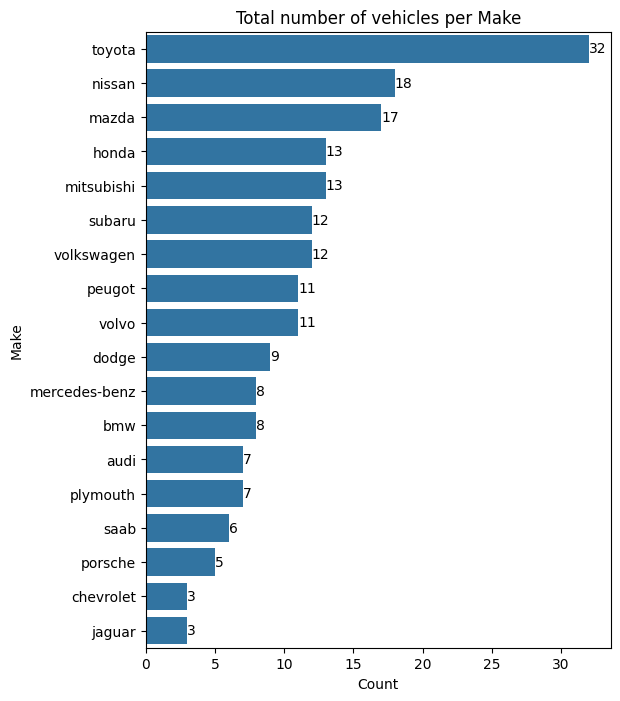

In [228]:
fig, ax = plt.subplots(figsize=(6, 8))
sns.barplot(make_frequency, x='count', y='make', ax=ax)
plt.title('Total number of vehicles per Make')
plt.ylabel('Make')
plt.xlabel('Count')
ax.bar_label(ax.containers[0])
plt.show()

##### c) **How many body styles are there in the dataset?** 

In [229]:
body_stle_count = automobile_df['body-style'].nunique()
print(f"There are a total of {body_stle_count} body styles within the dataset")

There are a total of 5 body styles within the dataset


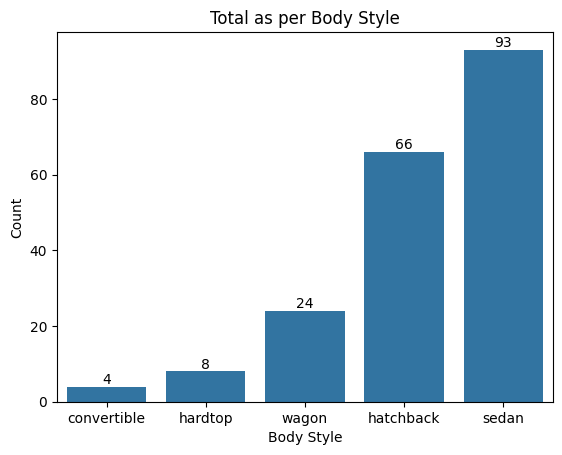

In [230]:
body_style_df = automobile_df.groupby('body-style')[['body-style']].count().rename(columns={'body-style': 'count'}).reset_index()
body_style_df.sort_values(by='count', inplace=True)

fig, ax = plt.subplots()
sns.barplot(body_style_df, x='body-style', y='count', ax=ax)
plt.title('Total as per Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])
plt.show()

##### d) **What is the most common fuel system in the vehicles in the dataset?**

In [231]:
fuel_system_df = automobile_df.groupby('fuel-system')[['fuel-system']].count().rename(columns={'fuel-system':'count'}).reset_index()
fuel_system_df.sort_values(by='count', inplace=True)
popular_fuel_system = fuel_system_df.loc[fuel_system_df['count'].idxmax()]['fuel-system']
print(f"The most common fuel system in the vehicles within the dataset is: {popular_fuel_system}")

The most common fuel system in the vehicles within the dataset is: mpfi


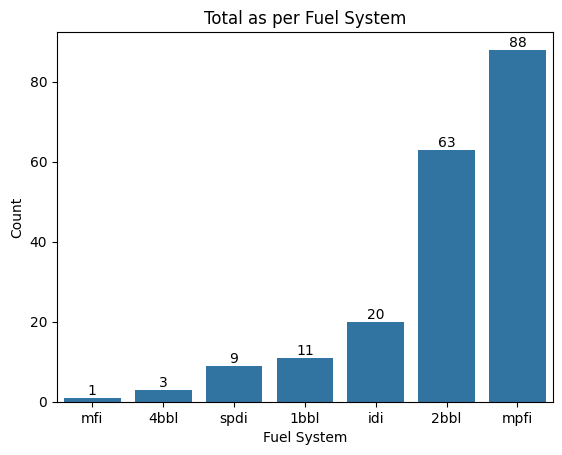

In [232]:
fig, ax = plt.subplots()
sns.barplot(fuel_system_df, x='fuel-system', y='count', ax=ax)
plt.title('Total as per Fuel System')
plt.xlabel('Fuel System')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])
plt.show()

##### e) **What's the most common number of cylinders to have in a vehicle based on the dataset?**

In [233]:
num_of_cylinder_df = automobile_df.groupby('num-of-cylinders')[['num-of-cylinders']].count().rename(columns={'num-of-cylinders':'count'}).reset_index()
num_of_cylinder_df.sort_values(by='count', inplace=True)
common_number_of_cylinders = num_of_cylinder_df.loc[num_of_cylinder_df['count'].idxmax()]['num-of-cylinders']

print(f"Most common number of cylinders for vehicles in the dataset: {common_number_of_cylinders}")

Most common number of cylinders for vehicles in the dataset: four


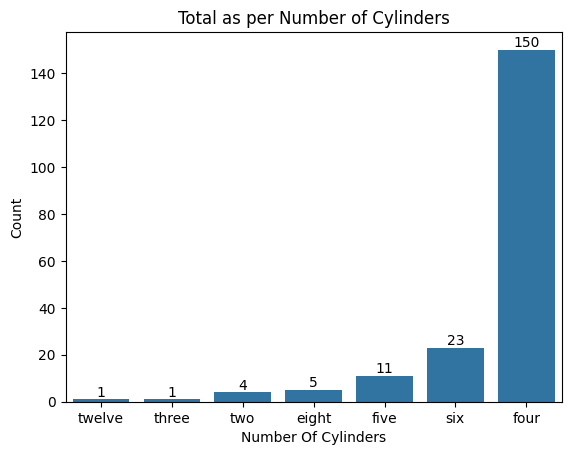

In [234]:
fig, ax = plt.subplots()
sns.barplot(num_of_cylinder_df, x='num-of-cylinders', y='count', ax=ax)
plt.title('Total as per Number of Cylinders')
plt.xlabel('Number Of Cylinders')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])
plt.show()

##### f) **Within the top 5 most popular vehicle makes, what body-types are produced?**

In [235]:
style_make_df = automobile_df.loc[:, ['body-style', 'make']]
style_make_df['id'] = range(1, automobile_df.shape[0] + 1)
style_make_df

,body-style,make,id
0,sedan,audi,1
1,sedan,audi,2
2,sedan,audi,3
3,sedan,audi,4
4,wagon,audi,5
...,...,...,...
190,sedan,volvo,191
191,sedan,volvo,192
192,sedan,volvo,193
193,sedan,volvo,194


In [236]:
style_make_pivot = (
    style_make_df.pivot_table(values='id'
                          , index='make'
                          , columns='body-style'
                          , aggfunc='count').fillna(0)
)
style_make_pivot = style_make_pivot.apply(lambda x: round(x / x.sum() * 100, 2), axis=1)
style_make_pivot

body-style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
audi,0.00,0.00,14.29,71.43,14.29
bmw,0.00,0.00,0.00,100.00,0.00
chevrolet,0.00,0.00,66.67,33.33,0.00
dodge,0.00,0.00,55.56,33.33,11.11
honda,0.00,0.00,53.85,38.46,7.69
jaguar,0.00,0.00,0.00,100.00,0.00
mazda,0.00,0.00,58.82,41.18,0.00
mercedes-benz,12.50,25.00,0.00,50.00,12.50
mitsubishi,0.00,0.00,69.23,30.77,0.00


In [237]:
# The top 5 most popular makes in the dataset
most_popular = make_frequency['make'][:5].values.tolist()

# Pivot table of the top 5 most common makes
top_5_style_make_pivot = style_make_pivot[style_make_pivot.index.isin(most_popular)]

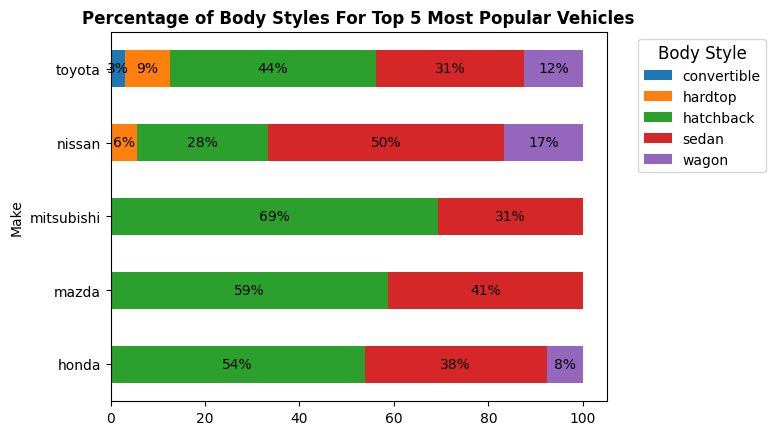

In [238]:
ax = top_5_style_make_pivot.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Body Style', title_fontsize='12', fontsize='10')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if width == 0:
        continue
    else:
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f}%'.format(width), 
                horizontalalignment='center', 
                verticalalignment='center')
plt.ylabel('Make')
plt.title(label='Percentage of Body Styles For Top 5 Most Popular Vehicles', fontweight='bold')
plt.show()

##### g) **What is the average curb-weight per vehicle make?**

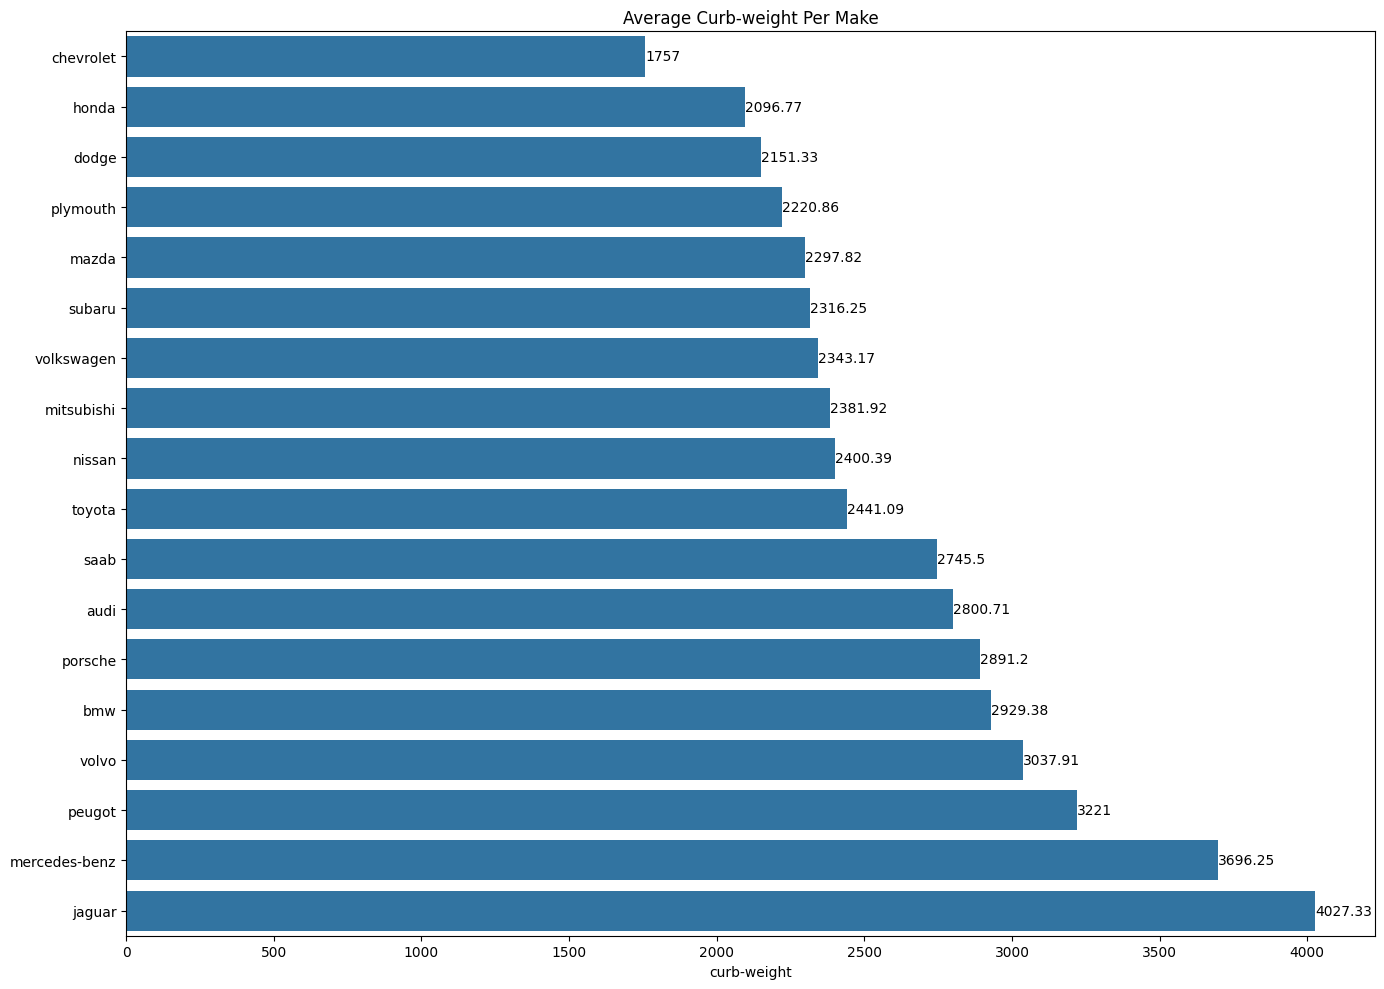

In [239]:
fig, ax = plt.subplots(figsize=(14, 10))
curb_weight_make_pivot = automobile_df.groupby('make')[['curb-weight']].mean().sort_values('curb-weight')
sns.barplot(curb_weight_make_pivot, x='curb-weight', y=curb_weight_make_pivot.index.tolist(), ax=ax)
ax.bar_label(ax.containers[0])
plt.title('Average Curb-weight Per Make')
plt.tight_layout()
plt.show()

##### g) **What is the average price of vehicle depending on the number of cylinders a vehicle has**

In [240]:
mean_price_cylinder_df = automobile_df.groupby('num-of-cylinders')[['price']].mean().reset_index().sort_values(by='price')
mean_price_cylinder_df

,num-of-cylinders,price
4,three,5151.000000
2,four,10227.206667
6,two,13020.000000
0,eight,20128.500000
1,five,21630.469697
3,six,22187.391304
5,twelve,36000.000000


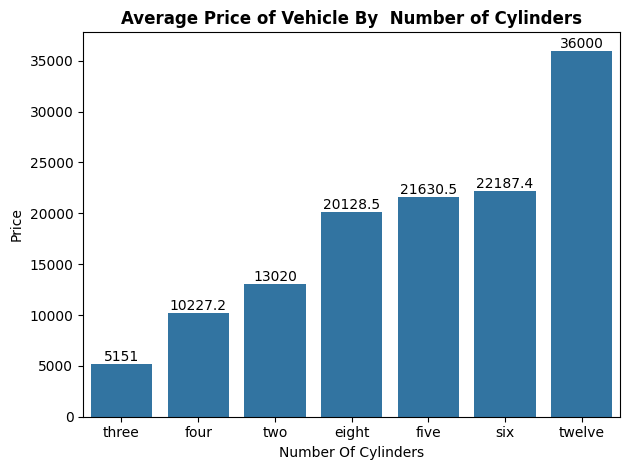

In [241]:
fig, ax = plt.subplots()
sns.barplot(mean_price_cylinder_df, x='num-of-cylinders', y='price', ax=ax)
plt.ylabel('Price')
plt.xlabel('Number Of Cylinders')
plt.title('Average Price of Vehicle By  Number of Cylinders', fontweight='bold')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

##### h) **What is the relationship between curb-weight and engine-size?**

In [242]:
engine_curb_corr = float(automobile_df['engine-size'].corr(automobile_df['curb-weight'], method='pearson'))
print(f"The correlation between the engine-size and curb-weight is {engine_curb_corr}, which is considered a weak correlation")

The correlation between the engine-size and curb-weight is 0.4392982807469268, which is considered a weak correlation


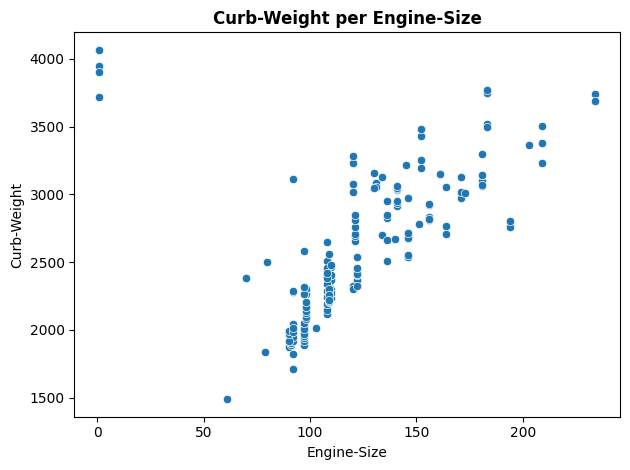

In [243]:
sns.scatterplot(automobile_df
                , x='engine-size'
                , y='curb-weight')
plt.title('Curb-Weight per Engine-Size', fontweight='bold')
plt.xlabel('Engine-Size')
plt.ylabel('Curb-Weight')
plt.tight_layout()
plt.show()

`NOTE`:
* Through the scatterplot, we can note a linear relationship between the curb weight and the engine size of a vehicle within the dataset. 

* The strength of the correlation can be seen with how densely (or not) are to a gradient line. In this instance, the weak correlation str

In [244]:
automobile_df.select_dtypes(include='number')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,city-mpg,highway-mpg,price,fuel-type_gas,aspiration_turbo,num-of-doors_four,num-of-doors_two,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear
0,2,164.0,99.8,176.6,66.2,54.3,2337,109.0,3.19,3.40,...,24.0,30.0,13950.0,1,0,1,0,1,0,0
1,2,164.0,99.4,176.6,66.4,54.3,2824,136.0,3.19,3.40,...,18.0,22.0,17450.0,1,0,1,0,0,0,0
2,2,161.0,99.8,177.3,66.3,53.1,2507,136.0,3.19,3.40,...,19.0,25.0,15250.0,1,0,0,1,1,0,0
3,1,158.0,105.8,192.7,71.4,55.7,2844,136.0,3.19,3.40,...,19.0,25.0,17710.0,1,0,1,0,1,0,0
4,1,161.0,105.8,192.7,71.4,55.7,2954,136.0,3.19,3.40,...,19.0,25.0,18920.0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-1,95.0,109.1,188.8,68.9,55.5,2952,141.0,3.78,3.15,...,23.0,28.0,16845.0,1,0,1,0,0,1,0
191,-1,95.0,109.1,188.8,68.8,55.5,3049,141.0,3.78,3.15,...,19.0,25.0,19045.0,1,1,1,0,0,1,0
192,-1,95.0,109.1,188.8,68.9,55.5,3012,173.0,3.58,2.87,...,18.0,23.0,21485.0,1,0,1,0,0,1,0
193,-1,95.0,109.1,188.8,68.9,55.5,3217,145.0,3.01,3.40,...,26.0,27.0,22470.0,0,1,1,0,0,1,0


##### i) **What is the average price of vehicle make?**

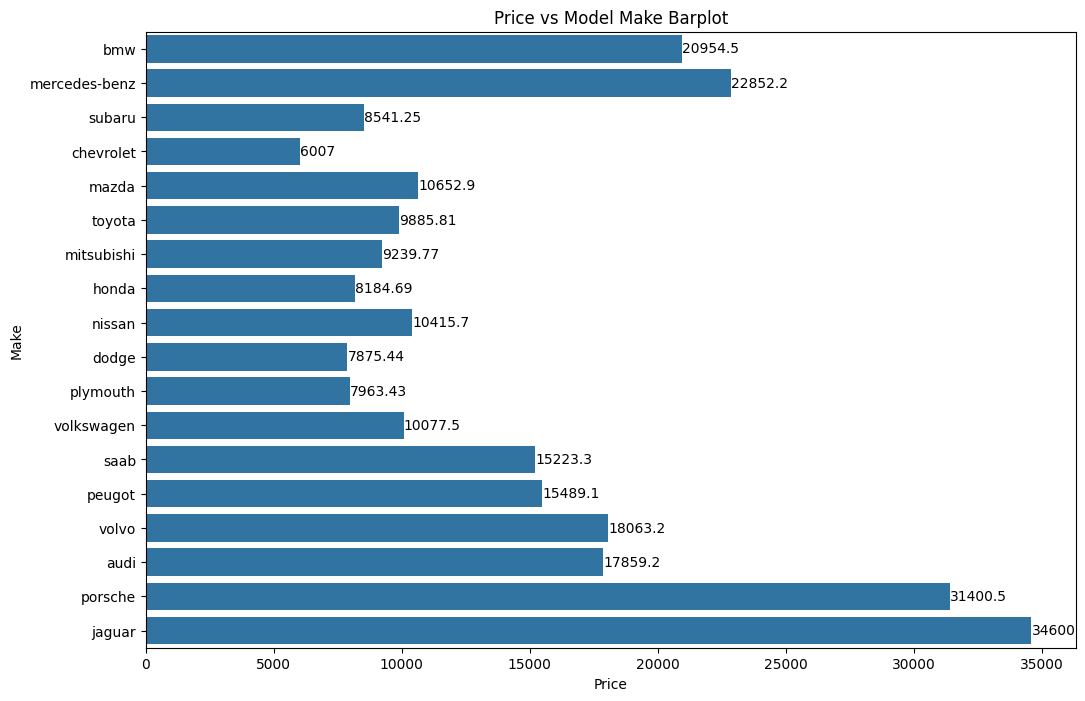

In [245]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=automobile_df.sort_values(by='price'), orient='h', y='make', x='price', errorbar=None, estimator='mean', ax=ax)
ax.bar_label(ax.containers[0])
plt.xlabel('Price')
plt.ylabel('Make')
plt.title("Price vs Model Make Barplot")
plt.show()

##### j) **What are the most important features when considering price feature**

In [246]:
# Create a correlation matrix
corr_matrix = automobile_df.select_dtypes(include='number').corr()

In [247]:
# Find the features that are correlated to the price feature
corr_price = corr_matrix['price'].sort_values(ascending=False)
corr_price

price                   1.000000
curb-weight             0.731964
width                   0.650349
drive-wheels_rwd        0.598574
length                  0.569645
horsepower              0.548701
engine-size             0.532007
wheel-base              0.503115
bore                    0.488747
engine-location_rear    0.367422
normalized-losses       0.344083
aspiration_turbo        0.230273
compression-ratio       0.207848
num-of-doors_four       0.092527
height                  0.079846
stroke                  0.077706
peak-rpm               -0.019632
symboling              -0.065224
num-of-doors_two       -0.084362
fuel-type_gas          -0.142920
drive-wheels_fwd       -0.564503
highway-mpg            -0.609123
city-mpg               -0.629495
Name: price, dtype: float64

In [248]:
print(f"The feature that is most positively correlated to price is: {corr_price.index[1]}")
print(f"The feature that is most negatively correlated to price is: {corr_price.index[-1]}")

The feature that is most positively correlated to price is: curb-weight
The feature that is most negatively correlated to price is: city-mpg


`NOTE`:

1 **Understanding correlation coefficients**:

According to Jules J. Berman, a correlation coefficient that is greater than or equal to 0.8 is considered very strong, whilst a correlation coefficient between 0.6 to 0.79 is considered moderately strong. A coefficient of 0.3 to 0.59 is considered moderate, whilst anything less than 0.3 is considered to have a poor correlation. A correlation coefficient of 0 means no correlation between features. (Jules J. Berman, 2016)

In [249]:
# Store features with a moderate to strong correlation to price feature
corr_condition = ((corr_price >= 0.5) | (corr_price <= -0.5))
most_corr_price = corr_price[corr_condition]

In [250]:
strongest_relationships = []
moderate_relationships = []
for index, corr_coeff in most_corr_price.items():
    if (corr_coeff >= 0.7) | (corr_coeff <= -0.7):
        if corr_coeff == 1:
            continue
        else:
            strongest_relationships.append(index)
    else:
        moderate_relationships.append(index)
    
print(f"The strongest relationships with price feature include: {', '.join(strongest_relationships)}")
print(f"The moderate relationships with price feature include: {', '.join(moderate_relationships)}")

The strongest relationships with price feature include: curb-weight
The moderate relationships with price feature include: width, drive-wheels_rwd, length, horsepower, engine-size, wheel-base, drive-wheels_fwd, highway-mpg, city-mpg


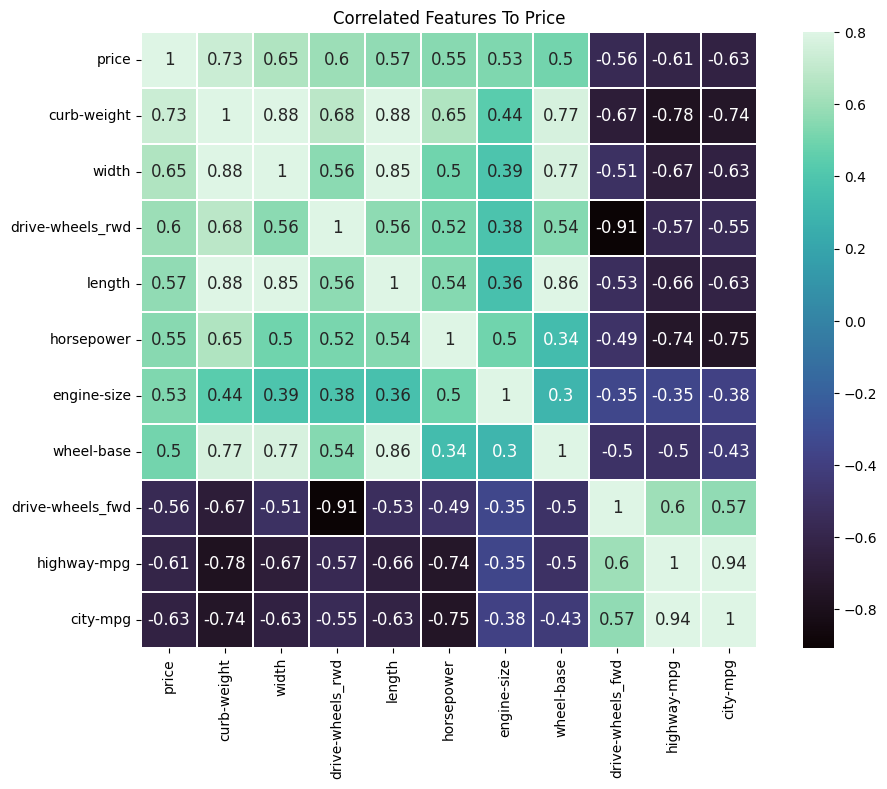

In [251]:
# Store the index of the most correlated features to price
most_corr_index = most_corr_price.index

# Get a correlation matrix of the features most correlated to price
corr_price_matrix = automobile_df.loc[:, most_corr_index].corr()

# Plot ot heatmat
figure, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_price_matrix
            , linewidths=0.01
            , vmax=0.8
            , square=True
            , annot=True
            , cmap='mako'
            , linecolor='white'
            , annot_kws= {'size': 12})
plt.title('Correlated Features To Price')
plt.show()

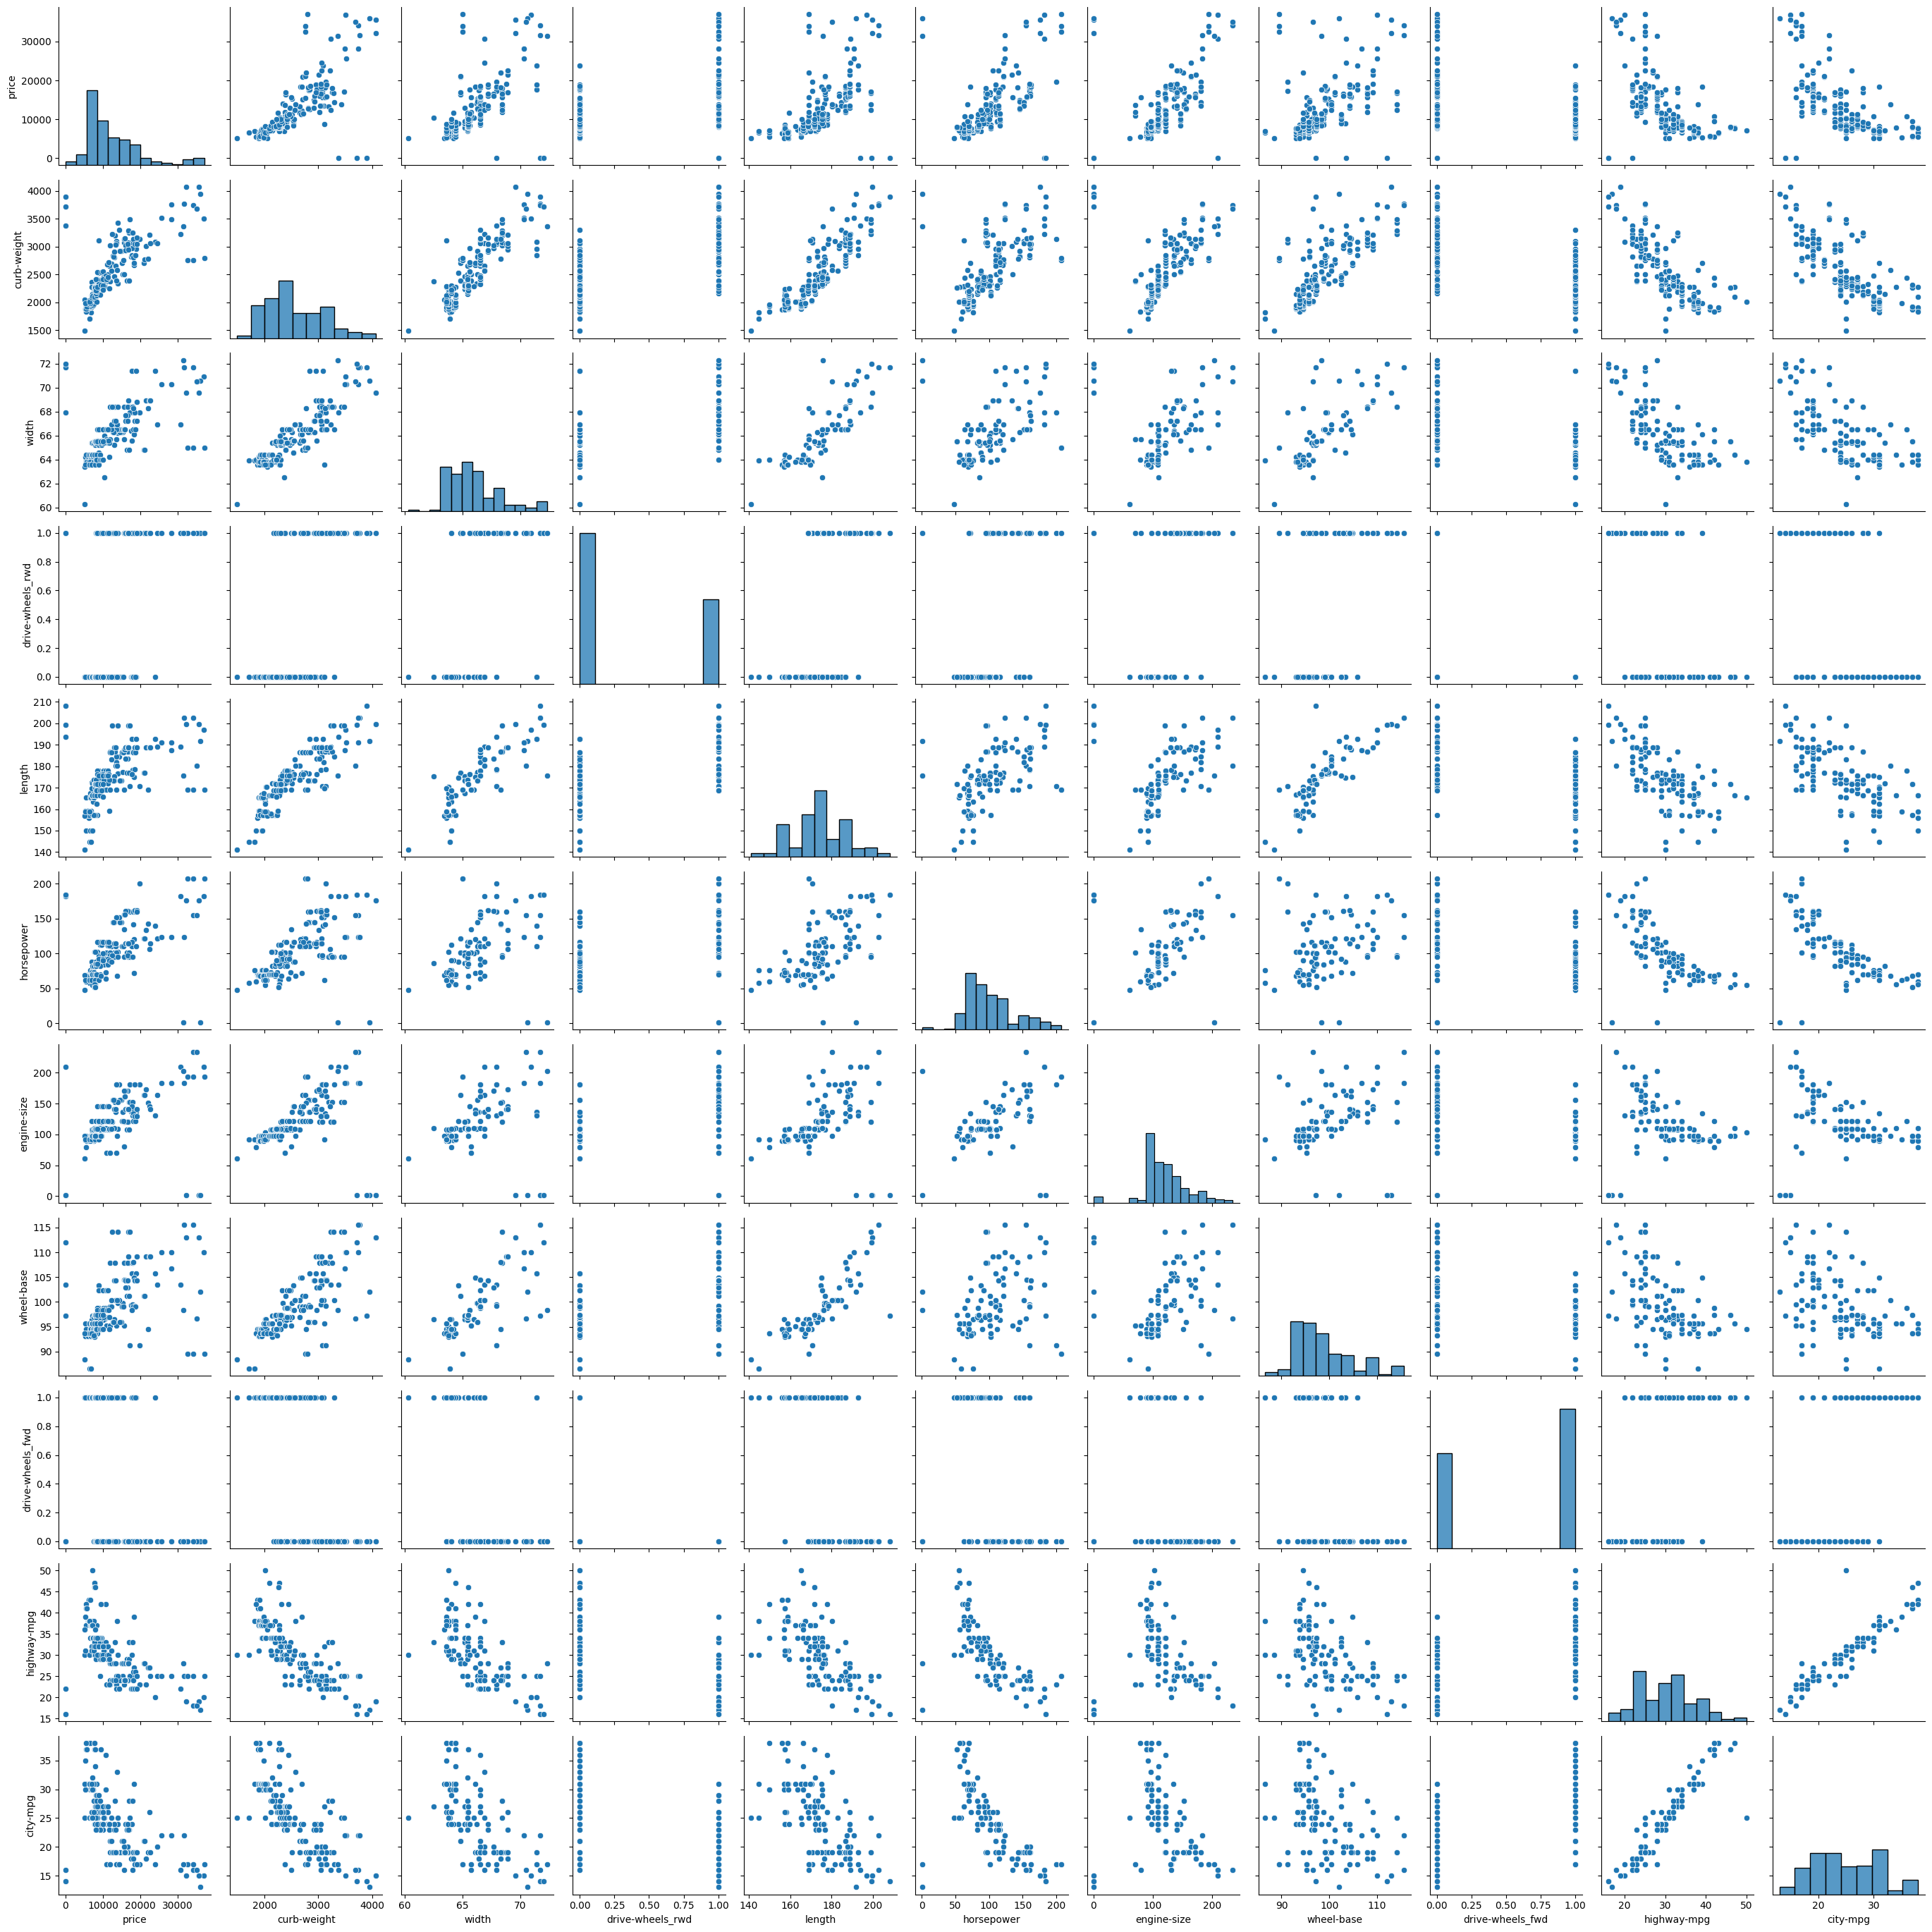

In [252]:
sns.pairplot(automobile_df.loc[:, most_corr_index])
plt.tight_layout()
plt.show()

In [253]:
city_highway_df = automobile_df.loc[:, ['make', 'city-mpg', 'highway-mpg', 'fuel-type', 'price']]
city_highway_df

,make,city-mpg,highway-mpg,fuel-type,price
0,audi,24.0,30.0,gas,13950.0
1,audi,18.0,22.0,gas,17450.0
2,audi,19.0,25.0,gas,15250.0
3,audi,19.0,25.0,gas,17710.0
4,audi,19.0,25.0,gas,18920.0
...,...,...,...,...,...
190,volvo,23.0,28.0,gas,16845.0
191,volvo,19.0,25.0,gas,19045.0
192,volvo,18.0,23.0,gas,21485.0
193,volvo,26.0,27.0,diesel,22470.0


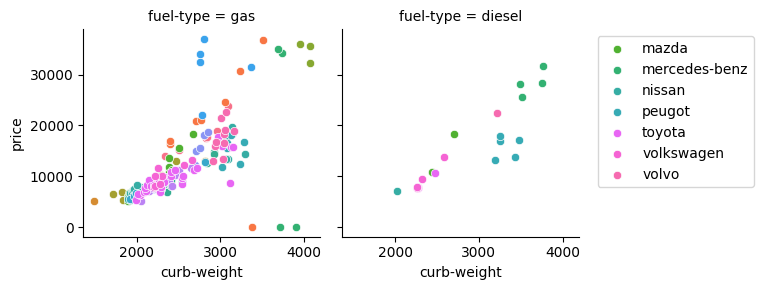

In [254]:
fg = sns.FacetGrid(data=automobile_df, hue='make', col='fuel-type')
fg.map(sns.scatterplot,'curb-weight', 'price')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

`NOTE`:

* Based on the correlation coefficient, it is evident to see that the there is a moderately strong positive correlation between the price of a vehicle, and  the curb-weight of the vehicle. In an article by Deana Beltsis, curb weight is referred to as the total weight of a vehicle, inclusive of standard equipment and necessary operating fluids such as motor oil, transmission oil and brake fluid, but without passengers or cargo. It’s essentially the weight of a ready-to-drive vehicle without any load. Deana Beltsis (2024). 

* We can also see that from the scatterplot looking at the relationship between price and curb-weight, that fuel-type brings variation in the data. This can be seen with the number of outliers where the points are the furtherest from any linear gradient. These variations are less compared to when looking at the the relationship between the two variables when the vehicle is that of a diesel vehicle.

#### 4. **Hypothesis Testing**

**_Null Hypothesis_**:
- The Null Hypothesis is the assumption that the event will not occur. A null hypothesis has no bearing on the study's outcome unless it is rejected. (Biswal 2024)

**_Alternative Hypothesis_**:
- The Alternate Hypothesis is the logical opposite of the null hypothesis. The acceptance of the alternative hypothesis follows the rejection of the null hypothesis. H1 is the symbol for it. (Biswal 2024)

**_Significance Level_**:
- In an article by Jim Frost , The significance level, which is also recognised as  alpha or ɑ is a measure of the strength of the evidence that must be present in your sample before you will reject the null hypothesis and conclude that the effect is statistically significant. The researcher determines the significance level before conducting the experiment.(Frost N.D.)

- Our significance level will be 5%, or ɑ = 0.05

**_Statistical Test_**:
- The statistical test we will be using will be the t-test, using the correlation coefficient. This is because the two features in question are numerical features, the correlation coefficient can then be used to determine the p-level, which according to Avijeet Biswal: A p-value is a metric that expresses the likelihood that an observed difference could have occurred by chance. As the p-value decreases the statistical significance of the observed difference increases. If the p-value is too low, you reject the null hypothesis. (Biswal 2024)

- According to an article written by Rebecca Bevans, a t-test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another. (Bevans 2023)

##### 4.1 **Null Hypothesis**:
___
* There is no linear relationship between the price of a vehichle and the vehicles curb-weight.

##### 4.2 **Alternative Hypothesis**:
___
* There is a linear relationship between the price of a vehichle and the vehicles curb-weight.

##### 4.3 **Significance Level**:
___
* Alpha is 5%. Therefore, ɑ = 0.05

##### 4.4 **Statistical Test**:
___

In [255]:
t_test_results = pearsonr(automobile_df['price'], automobile_df['curb-weight'])
significance_level = 0.05
print(f"P-value: {t_test_results.pvalue}")
print(f"Correlation_coeff: {t_test_results.statistic}\n")

if t_test_results.pvalue < significance_level:
    print(
        f'We reject null hypothesis. The test results are statistically significant at the '
        f'5% level and provide very strong evidence against the null hypothesis.'
    )
else:
    print('We Do not reject the null hypothesis')

P-value: 5.393717439465754e-34
Correlation_coeff: 0.7319636146156214

We reject null hypothesis. The test results are statistically significant at the 5% level and provide very strong evidence against the null hypothesis.


___
##  **Bibliography**
___

1. Harika Bonthu (2024), _Analytics Vidhya_, retrieved 24/07/2024,
<https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/>

2. Eric Kleppen (2023), 'How To Find Outliers in Data Using Python (and How To Handle Them)', _Career Foundry Blog_, 11 May,
<https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/> 

3. Jules J. Berman (2016), _Data Simplification Taming Information with Open Source Tools_, [_Online_], Morgan Kaufmann, Available at:
<https://www.sciencedirect.com/topics/computer-science/pearson-correlation#:~:text=The%20P%20value%20is%20typically,coefficient%20is%20not%20statistically%20significant.>

4. Deana Beltsis (2024), 'Curb Weight vs Gross Weight : A Comprehensive Guide', _Geotab Blog_, 31 May, Available at:
<https://www.geotab.com/blog/curb-weight-vs-gross-weight/>

5. Jim Frost (N.D.), _Statistics By Jim Making statistics intuitive_, Available at:
<https://statisticsbyjim.com/glossary/significance-level/>

6. Avijeet Biswal (2024), 'What is Hypothesis Testing in Statistics? Types and Examples', _Simplilearn Tutorials_, 9 July, Available at:
<https://www.simplilearn.com/tutorials/statistics-tutorial/hypothesis-testing-in-statistics#null_hypothesis_and_alternate_hypothesis>

7. Rebecca Bevans (2020), 'An Introduction to t Tests | Definitions, Formula and Examples', _Scribbr_, Available at:
<https://www.scribbr.com/statistics/t-test/>